## Lab 5 z Podstaw Uczenia Maszynowego - Drzewo Decyzyjne
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

In [147]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1])), 4)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1])), 4)

def plot_class(X_syn_test, y_pred, model, method):
        X_pred_0 = X_syn_test[y_pred == 0]
        X_pred_1 = X_syn_test[y_pred == 1]
        x_min, x_max = X_syn_test[:, 0].min() - 0.2, X_syn_test[:, 0].max() + 0.2
        y_min, y_max = X_syn_test[:, 1].min() - 0.2, X_syn_test[:, 1].max() + 0.2
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2)
        plt.scatter(X_pred_0[:, 0], X_pred_0[:, 1], marker='.', label='Klasa 1')
        plt.scatter(X_pred_1[:, 0], X_pred_1[:, 1], marker='.', label='Klasa 2')
        plt.title(f'Powierzchnia decyzyjna {method}')
        plt.xlabel('Cecha 1')
        plt.ylabel('Cecha 2')
        plt.legend()

def pred_info(y_test, y_pred, name_of_method):
    accuracy = accuracy_score(y_test, y_pred)
    c_matrix = confusion_matrix(y_test, y_pred)
    print(f'\n{name_of_method}:')
    print(f'Macierz pomylek: \n{c_matrix}')
    print(f'Dokladnosc: {accuracy}\nCzulosc: {sensitivity(c_matrix)}\nSwoistosc: {specificity(c_matrix)}')

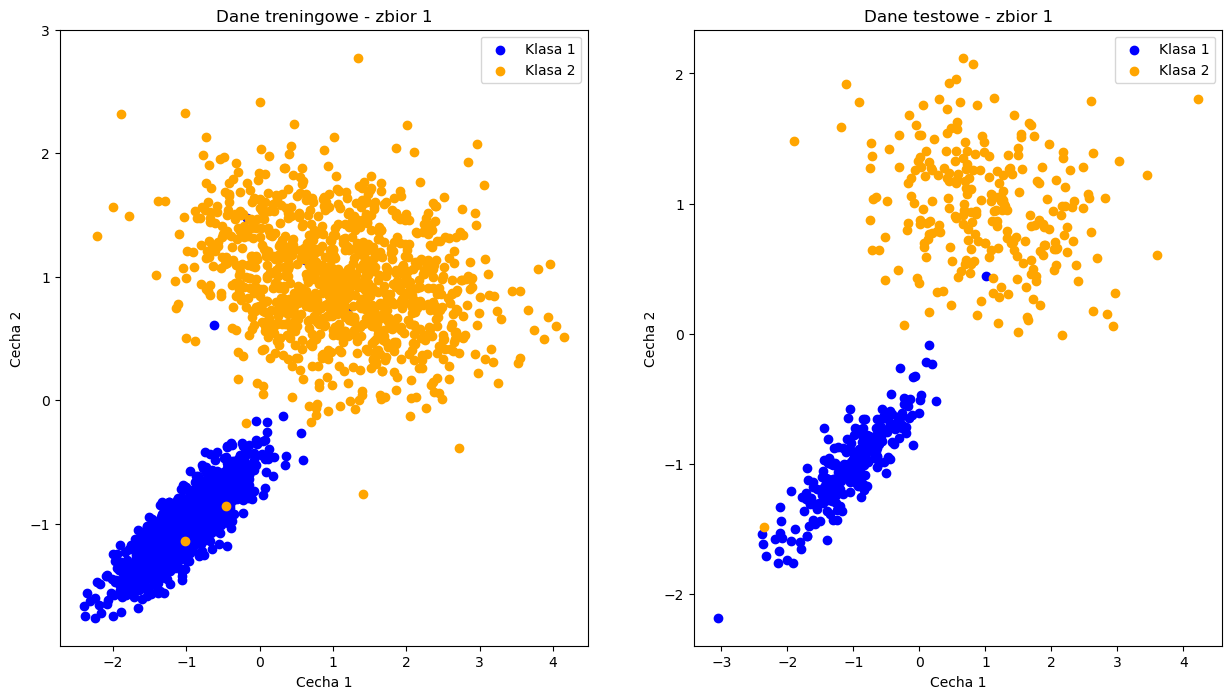

In [148]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

index = 254397

scaler = MinMaxScaler()
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=index)

#Podzial na podzbiory
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, t, test_size=0.2, random_state=index)


# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_train_2[(y_train_2 == 0)]
klasa_1_train = X_train_2[(y_train_2 == 1)]
klasa_0_test = X_test_2[(y_test_2 == 0)]
klasa_1_test = X_test_2[(y_test_2 == 1)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

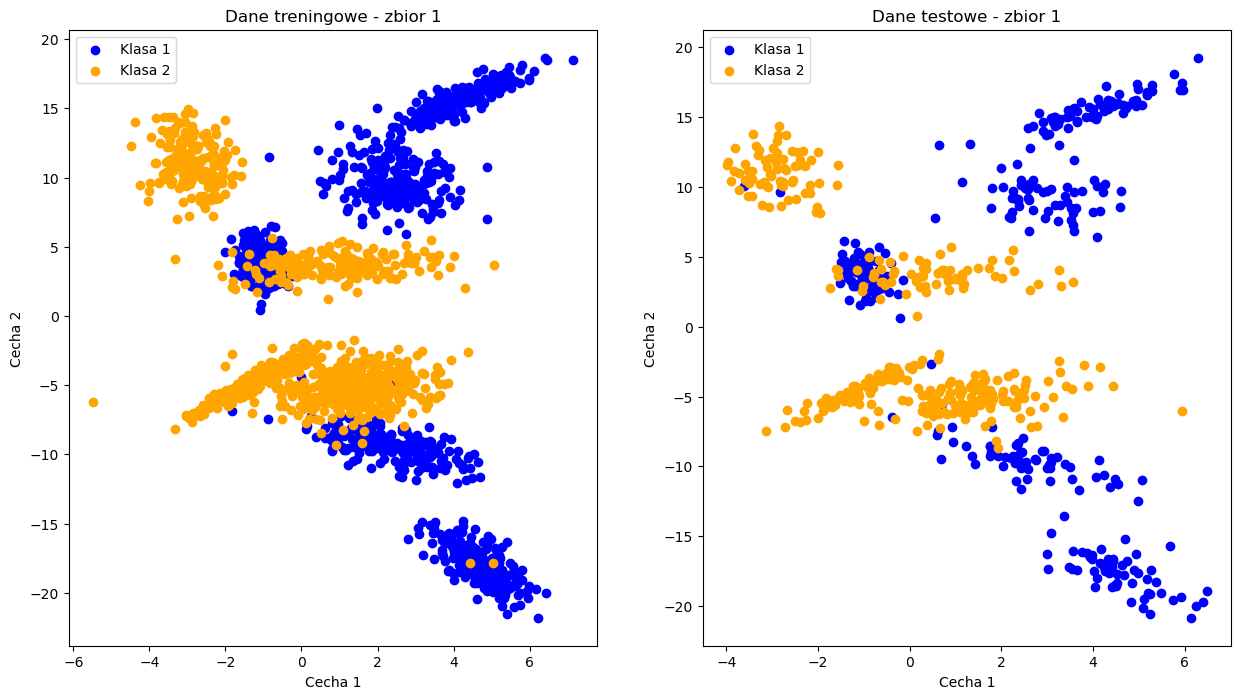

In [154]:
# Dane wejsciowe
X, t = make_classification(n_samples=2597, n_features=4, n_informative=4, n_repeated=0, n_clusters_per_class=5, random_state=index, hypercube=False, n_redundant=0, class_sep=20)
X = X[:,:2]
#Podzial na podzbiory
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, t, test_size=0.25, random_state=index)

# Podzial zbiorow na klasy w celu ich wyswietlenia
klasa_0_train = X_train_4[(y_train_4 == 0)]
klasa_1_train = X_train_4[(y_train_4 == 1)]
klasa_0_test = X_test_4[(y_test_4 == 0)]
klasa_1_test = X_test_4[(y_test_4 == 1)]
# klasa_2_train = X_train_4[(y_train_4 == 2)]
# klasa_3_train = X_train_4[(y_train_4 == 3)]
# klasa_2_test = X_test_4[(y_test_4 == 2)]
# klasa_3_test = X_test_4[(y_test_4 == 3)]

# Wyswietlenie danych
_, axs = plt.subplots(1, 2, figsize=(15, 8))
ax = axs[0]
ax.scatter(klasa_0_train[:,0], klasa_0_train[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_train[:,0], klasa_1_train[:,1], c = "orange", label="Klasa 2")
# ax.scatter(klasa_2_train[:,0], klasa_2_train[:,1], c = "pink", label="Klasa 3")
# ax.scatter(klasa_3_train[:,0], klasa_3_train[:,1], c = "green", label="Klasa 4")
ax.set_title("Dane treningowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

ax = axs[1]
ax.scatter(klasa_0_test[:,0], klasa_0_test[:,1], c = "blue", label="Klasa 1")
ax.scatter(klasa_1_test[:,0], klasa_1_test[:,1], c = "orange", label="Klasa 2")
# ax.scatter(klasa_2_test[:,0], klasa_2_test[:,1], c = "pink", label="Klasa 3")
# ax.scatter(klasa_3_test[:,0], klasa_3_test[:,1], c = "green", label="Klasa 4")
ax.set_title("Dane testowe - zbior 1")
ax.set_xlabel("Cecha 1")
ax.set_ylabel("Cecha 2")
ax.legend()

Sredni czas przy nieograniczonej glebokosci: 0.003617897033691406 s
Sredni czas przy glebokosci = 2: 0.0018039631843566894 s
Sredni czas przy glebokosci = 2: 0.0017840337753295898 s

Glebokosc=None:
Macierz pomylek: 
[[259   4]
 [  6 251]]
Dokladnosc: 0.9807692307692307
Czulosc: 0.9848
Swoistosc: 0.9767

Glebokosc=4:
Macierz pomylek: 
[[261   2]
 [  1 256]]
Dokladnosc: 0.9942307692307693
Czulosc: 0.9924
Swoistosc: 0.9961

Glebokosc=5:
Macierz pomylek: 
[[261   2]
 [  1 256]]
Dokladnosc: 0.9942307692307693
Czulosc: 0.9924
Swoistosc: 0.9961


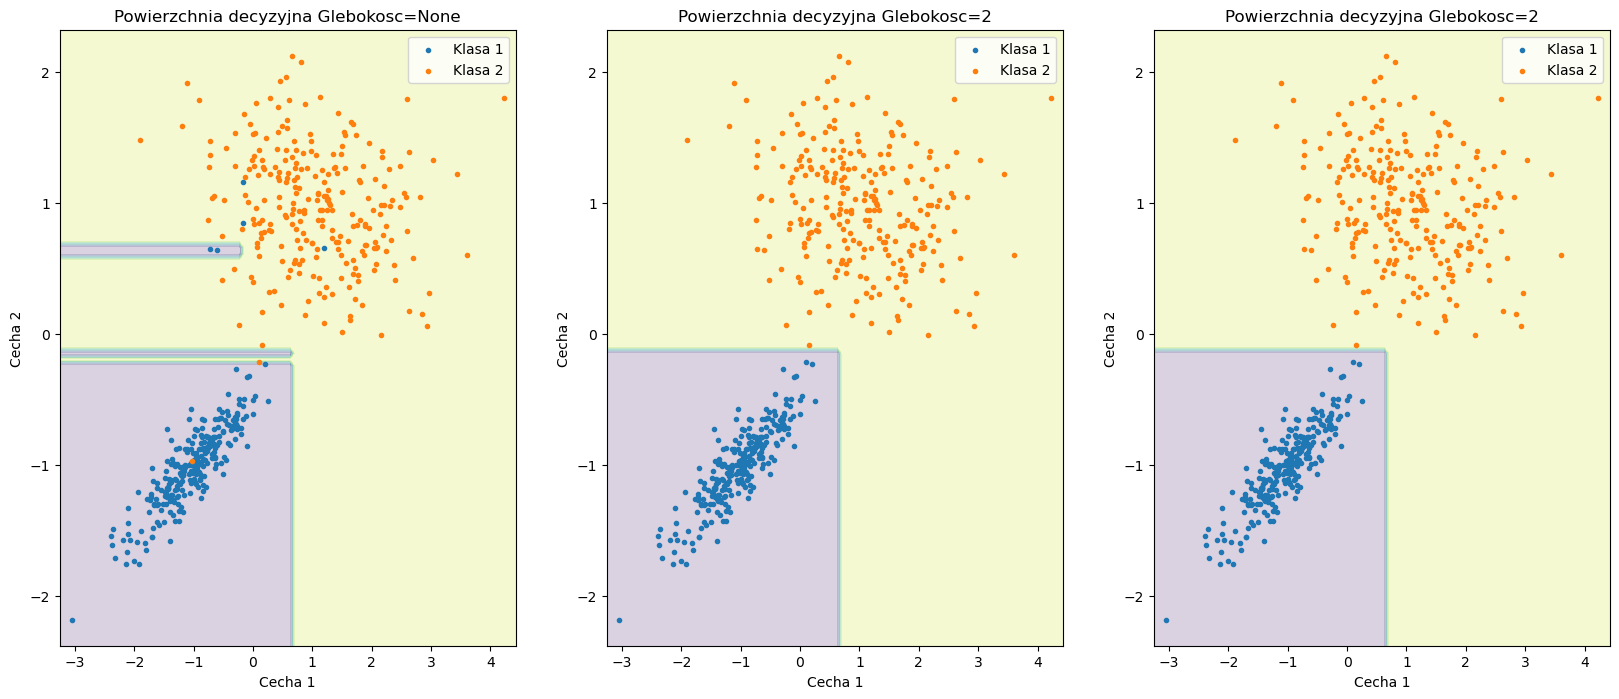

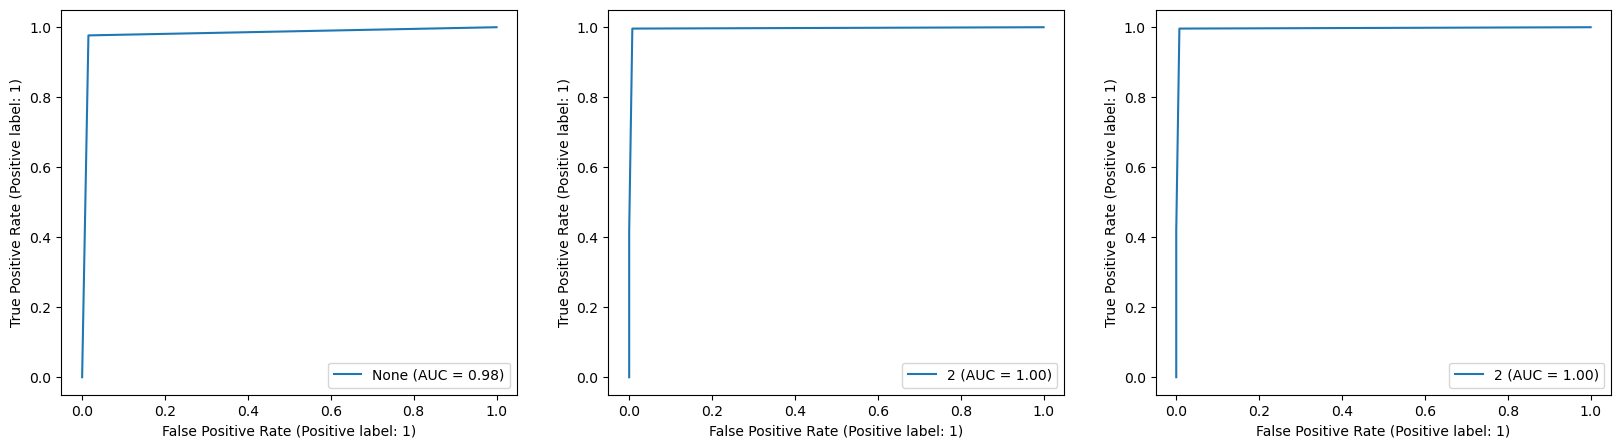

In [158]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay

# Nieograniczona glebokosc
dt_2_n = DecisionTreeClassifier(random_state=index, criterion='entropy')
start = time.time()
for i in range(100):
    dt_2_n.fit(X_train_2, y_train_2)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)/100} s')
y_pred_2_n = dt_2_n.predict(X_test_2)

# Glebokosc rowna ilosci cech
dt_2_4 = DecisionTreeClassifier(random_state=index, max_depth=2, criterion='entropy')
start = time.time()
for i in range(100):
    dt_2_4.fit(X_train_2, y_train_2)
end = time.time()
print(f'Sredni czas przy glebokosci = 2: {(end - start)/100} s')
y_pred_2_4 = dt_2_4.predict(X_test_2)

# Glebokosc rowna ilosci klastrow
dt_2_5 = DecisionTreeClassifier(random_state=index, max_depth=2, criterion='entropy')
start = time.time()
for i in range(100):
    dt_2_5.fit(X_train_2, y_train_2)
end = time.time()
print(f'Sredni czas przy glebokosci = 2: {(end - start)/100} s')
y_pred_2_5 = dt_2_5.predict(X_test_2)

pred_info(y_test_2, y_pred_2_n, 'Glebokosc=None')
pred_info(y_test_2, y_pred_2_4, 'Glebokosc=4')
pred_info(y_test_2, y_pred_2_5, 'Glebokosc=5')


plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plot_class(X_test_2, y_pred_2_n, dt_2_n, 'Glebokosc=None')
plt.subplot(1, 3, 2)
plot_class(X_test_2, y_pred_2_4, dt_2_4, 'Glebokosc=2')
plt.subplot(1, 3, 3)
plot_class(X_test_2, y_pred_2_4, dt_2_4, 'Glebokosc=2')

y_scores_2_n = dt_2_n.predict_proba(X_test_2)[:, 1]
y_scores_2_4 = dt_2_4.predict_proba(X_test_2)[:, 1]
y_scores_2_5 = dt_2_5.predict_proba(X_test_2)[:, 1]

_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_2, y_scores_2_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_2, y_scores_2_4, name='2', ax=axs[1])
RocCurveDisplay.from_predictions(y_test_2, y_scores_2_5, name='2', ax=axs[2])

Sredni czas przy nieograniczonej glebokosci: 0.003925647735595703 s
Sredni czas przy glebokosci = 4: 0.0026411652565002442 s
Sredni czas przy glebokosci = 5: 0.002989997863769531 s

Glebokosc=None:
Macierz pomylek: 
[[296  16]
 [ 20 318]]
Dokladnosc: 0.9446153846153846
Czulosc: 0.9487
Swoistosc: 0.9408

Glebokosc=4:
Macierz pomylek: 
[[287  25]
 [ 23 315]]
Dokladnosc: 0.9261538461538461
Czulosc: 0.9199
Swoistosc: 0.932

Glebokosc=5:
Macierz pomylek: 
[[299  13]
 [ 20 318]]
Dokladnosc: 0.9492307692307692
Czulosc: 0.9583
Swoistosc: 0.9408


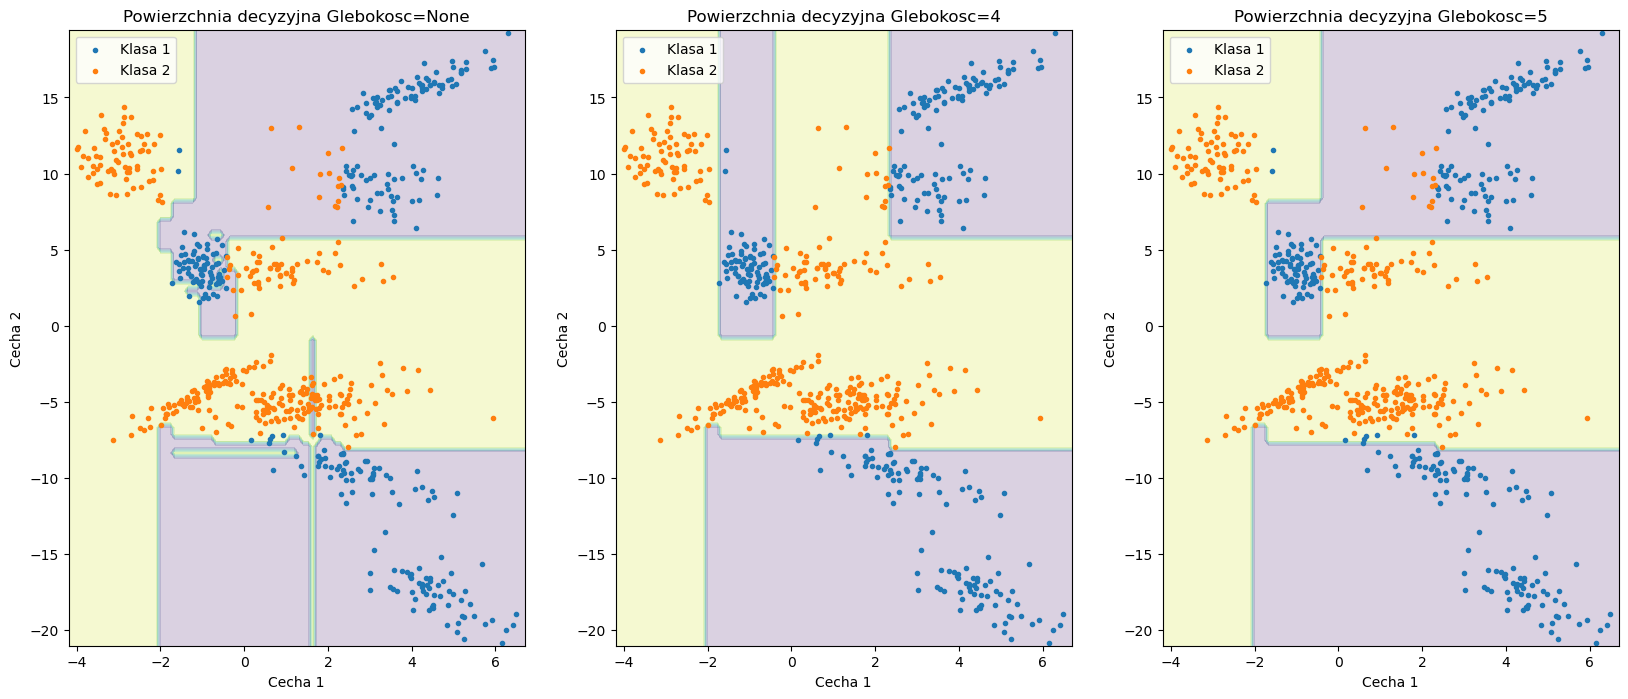

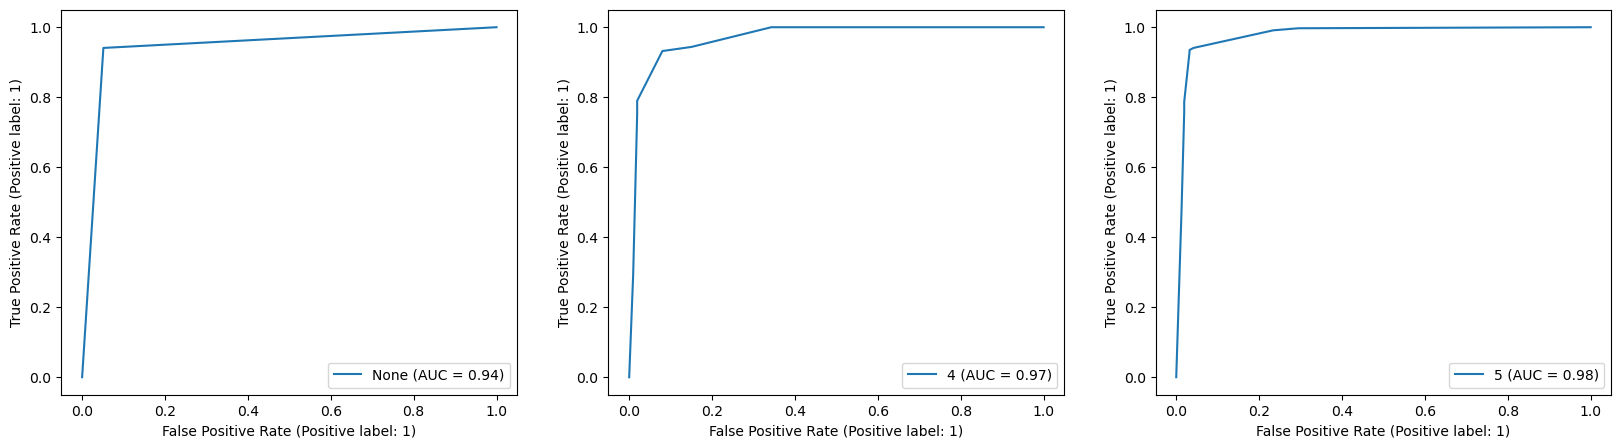

In [159]:
# Nieograniczona glebokosc
dt_4_n = DecisionTreeClassifier(criterion='entropy')
start = time.time()
for i in range(100):
    dt_4_n.fit(X_train_4, y_train_4)
end = time.time()
print(f'Sredni czas przy nieograniczonej glebokosci: {(end - start)/100} s')
y_pred_4_n = dt_4_n.predict(X_test_4)

# Glebokosc rowna ilosci cech
dt_4_4 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
start = time.time()
for i in range(100):
    dt_4_4.fit(X_train_4, y_train_4)
end = time.time()
print(f'Sredni czas przy glebokosci = 4: {(end - start)/100} s')
y_pred_4_4 = dt_4_4.predict(X_test_4)

# Glebokosc rowna ilosci klastrow
dt_4_5 = DecisionTreeClassifier(max_depth=5, criterion='entropy')
start = time.time()
for i in range(100):
    dt_4_5.fit(X_train_4, y_train_4)
end = time.time()
print(f'Sredni czas przy glebokosci = 5: {(end - start)/100} s')
y_pred_4_5 = dt_4_5.predict(X_test_4)

pred_info(y_test_4, y_pred_4_n, 'Glebokosc=None')
pred_info(y_test_4, y_pred_4_4, 'Glebokosc=4')
pred_info(y_test_4, y_pred_4_5, 'Glebokosc=5')

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plot_class(X_test_4, y_pred_4_4, dt_4_n, 'Glebokosc=None')
plt.subplot(1, 3, 2)
plot_class(X_test_4, y_pred_4_4, dt_4_4, 'Glebokosc=4')
plt.subplot(1, 3, 3)
plot_class(X_test_4, y_pred_4_4, dt_4_5, 'Glebokosc=5')

y_scores_4_n = dt_4_n.predict_proba(X_test_4)[:, 1]
y_scores_4_4 = dt_4_4.predict_proba(X_test_4)[:, 1]
y_scores_4_5 = dt_4_5.predict_proba(X_test_4)[:, 1]

_, axs = plt.subplots(1, 3, figsize=(20, 5))
RocCurveDisplay.from_predictions(y_test_4, y_scores_4_n, name='None', ax=axs[0])
RocCurveDisplay.from_predictions(y_test_4, y_scores_4_4, name='4', ax=axs[1])
RocCurveDisplay.from_predictions(y_test_4, y_scores_4_5, name='5', ax=axs[2])